<a href="https://colab.research.google.com/github/jeeda4/ML_Project/blob/master/ML_Project(DataViz).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Project 

Visualizing Data 

Spring 2020

In [0]:
import numpy as np
import pandas as pd

In [0]:
import pandas as pd
#loading in data 
#Importing the data
df = pd.read_csv ("https://raw.githubusercontent.com/GuiZamorano/Instagram_Like_Predictor/master/InstagramDatasetRegression.csv", encoding='utf-8-sig')

In [3]:
df.shape

(20668, 47)

In [4]:
df.head(5)

,edge_felix_video_timeline,edge_follow,edge_followed_by,edge_owner_to_timeline_media,highlight_reel_count,is_business_account,is_verified,comments_disabled,is_video,time_between,number_of_likes/mean,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,hour_of_day,hr_sin,hr_cos,"(0, 4]","(4, 8]","(8, 12]","(12, 16]","(16, 20]","(20, 24]",Auto Dealers,Business & Utility Services,Content & Apps,Creators & Celebrities,Food & Personal Goods,General Interest,Government Agencies,Grocery & Convenience Stores,Home & Auto,Home Goods Stores,Home Services,Lifestyle Services,Local Events,Non-Profits & Religious Organizations,Personal Goods & General Merchandise Stores,Professional Services,Publishers,Transportation & Accomodation Services,mean_likes,mean_comments
0,0,11,1927598,19,0,False,True,False,False,1072428.0,0.697678,0,0,0,0,0,1,0,12,1.224647e-16,-1.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
1,0,11,1927598,19,0,False,True,False,False,60664.0,1.132276,0,0,0,0,1,0,0,2,5.000000e-01,0.866025,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
2,0,11,1927598,19,0,False,True,False,False,458221.0,0.641902,0,0,0,0,0,0,1,9,7.071068e-01,-0.707107,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
3,0,11,1927598,19,0,False,True,False,False,1894759.0,1.072790,1,0,0,0,0,0,0,1,2.588190e-01,0.965926,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
4,0,11,1927598,19,0,False,True,False,False,409972.0,1.059753,0,0,0,0,1,0,0,3,7.071068e-01,0.707107,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727


In [0]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('number_of_likes/mean')) #Remove b from list
df = df[cols+['number_of_likes/mean']]

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20668 entries, 0 to 20667
Data columns (total 47 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   edge_felix_video_timeline                    20668 non-null  int64  
 1   edge_follow                                  20668 non-null  int64  
 2   edge_followed_by                             20668 non-null  int64  
 3   edge_owner_to_timeline_media                 20668 non-null  int64  
 4   highlight_reel_count                         20668 non-null  int64  
 5   is_business_account                          20668 non-null  bool   
 6   is_verified                                  20668 non-null  bool   
 7   comments_disabled                            20668 non-null  bool   
 8   is_video                                     20668 non-null  bool   
 9   time_between                                 20668 non-null  float64
 10

In [7]:
df[['edge_follow', 'edge_followed_by', 'edge_owner_to_timeline_media', 'mean_likes', 'mean_comments', 'number_of_likes/mean']].describe()

,edge_follow,edge_followed_by,edge_owner_to_timeline_media,mean_likes,mean_comments,number_of_likes/mean
count,20668.000000,2.066800e+04,20668.000000,2.066800e+04,20668.000000,20668.000000
mean,597.421183,8.379184e+06,2396.159667,2.982312e+05,3599.452535,1.000000
std,784.615460,1.611271e+07,3257.285681,5.217894e+05,12625.473183,0.506869
min,0.000000,8.000000e+00,2.000000,8.571429e-01,0.000000,0.000000
25%,140.000000,5.090398e+05,617.000000,9.423795e+03,110.090909,0.680820
50%,383.000000,4.139918e+06,1380.000000,1.464275e+05,834.090909,0.939907
75%,770.000000,1.024219e+07,2959.000000,3.949574e+05,3455.454545,1.219336
max,7246.000000,2.940083e+08,40472.000000,9.909698e+06,350137.000000,5.987419


In [8]:
corr = df.corr()["number_of_likes/mean"]
corr[np.argsort(corr, axis = 0)[::-1]]

number_of_likes/mean                           1.000000e+00
hr_cos                                         3.234267e-02
Saturday                                       3.135588e-02
Sunday                                         2.769917e-02
time_between                                   2.534327e-02
(16, 20]                                       2.291578e-02
hour_of_day                                    1.575312e-02
(20, 24]                                       1.495409e-02
Monday                                         9.703935e-03
Friday                                         9.506759e-03
(0, 4]                                         8.727016e-03
Content & Apps                                 5.573668e-18
highlight_reel_count                           4.590565e-18
Business & Utility Services                    4.387472e-18
edge_follow                                    4.267122e-18
edge_followed_by                               2.891275e-18
Creators & Celebrities                  

In [0]:
df = df.rename(columns={'number_of_likes/mean': 'number_of_likes_over_mean'})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


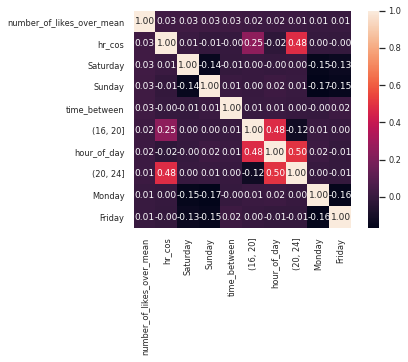

In [10]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'number_of_likes_over_mean').index
columns
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=0.75)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [11]:
correlations=df.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
7,"(hour_of_day, hr_sin)",-0.815784
3,"(Creators & Celebrities, is_business_account)",0.748046
8,"(mean_comments, mean_likes)",0.649453
6,"((4, 8], hr_sin)",0.600908
4,"((16, 20], hr_sin)",-0.568493
0,"(edge_followed_by, mean_likes)",0.551244
2,"((8, 12], hr_cos)",-0.551196
1,"((0, 4], hour_of_day)",-0.518755
5,"((20, 24], hour_of_day)",0.502076


In [12]:
df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday','number_of_likes_over_mean']].groupby(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],
as_index=False).mean().sort_values(by='Sunday', ascending=False)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,number_of_likes_over_mean
0,0,0,0,0,0,0,1,1.035169
1,0,0,0,0,0,1,0,1.044171
2,0,0,0,0,1,0,0,1.012899
3,0,0,0,1,0,0,0,0.937058
4,0,0,1,0,0,0,0,0.985147
5,0,1,0,0,0,0,0,0.991661
6,1,0,0,0,0,0,0,1.011682


In [13]:
df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday','(0, 4]', '(4, 8]', '(8, 12]', '(12, 16]', '(16, 20]','(20, 24]','number_of_likes_over_mean']].groupby(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday','(0, 4]', '(4, 8]', '(8, 12]', '(12, 16]', '(16, 20]','(20, 24]'],
as_index=False).mean().sort_values(by='Sunday', ascending=False)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,"(0, 4]","(4, 8]","(8, 12]","(12, 16]","(16, 20]","(20, 24]",number_of_likes_over_mean
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.946323
2,0,0,0,0,0,0,1,0,0,0,0,1,0,1.022107
3,0,0,0,0,0,0,1,0,0,0,1,0,0,1.028300
4,0,0,0,0,0,0,1,0,0,1,0,0,0,1.044590
5,0,0,0,0,0,0,1,0,1,0,0,0,0,1.062349
6,0,0,0,0,0,0,1,1,0,0,0,0,0,1.044381
1,0,0,0,0,0,0,1,0,0,0,0,0,1,1.008331
38,0,1,0,0,0,0,0,0,0,0,1,0,0,0.965020
30,0,0,1,0,0,0,0,0,0,0,0,1,0,1.033259
31,0,0,1,0,0,0,0,0,0,0,1,0,0,1.005242


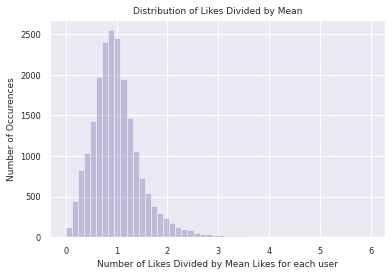

In [14]:
sns.distplot(df['number_of_likes_over_mean'], color="m", kde=False)
plt.title("Distribution of Likes Divided by Mean")
plt.ylabel("Number of Occurences")
plt.xlabel("Number of Likes Divided by Mean Likes for each user");

In [15]:
df['number_of_likes_over_mean'].kurt()

6.19558497348466

In [16]:
df['number_of_likes_over_mean'].skew()

1.6034886243477915